<h1 style = "color : Brown">ADVANCED REGRESSION ASSIGNMENT</h1>

### I. Importing and Understanding the data

In [54]:
# Supress Warnings
import warnings # supress warnings
warnings.filterwarnings('ignore')

In [55]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#for z-score
from scipy import stats

# Import scaler and regularisation models
import sklearn
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline

In [56]:
#reading countries_dataset
df = pd.read_csv(r"/Users/advait/Downloads/train.csv")

In [57]:
#looking at the first 5 rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
#checking total rows and columns
df.shape

(1460, 81)

In [59]:
#checking for null values and various datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [60]:
#some columns show null value, so, checking for them
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [61]:
#understanding the numerical data
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [62]:
#listing datatypes of all columns
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [63]:
#droping the id column
df.drop(['Id'], axis=1, inplace=True)

In [64]:
#seperating the different columns based on their datatype
numeric_df = df.select_dtypes(include=[np.number])
categorical_df = df.select_dtypes(exclude=[np.number])
num_df_col = numeric_df.columns
cat_df_col = categorical_df.columns

In [65]:
print(num_df_col)
print(cat_df_col)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'Heatin

### II. Data Visualization

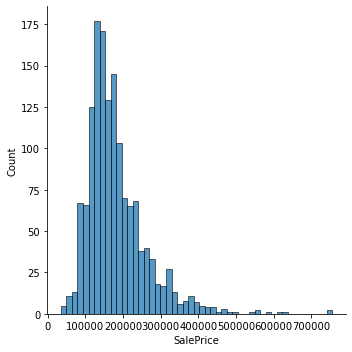

In [66]:
# Introspecting the target value SalePrice
sns.displot(df['SalePrice'])

In [67]:
df['SalePrice'].skew()

1.8828757597682129

In [68]:
df['SalePrice'].kurt()

6.536281860064529

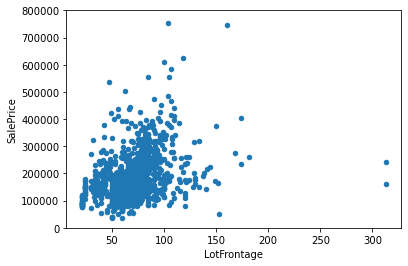

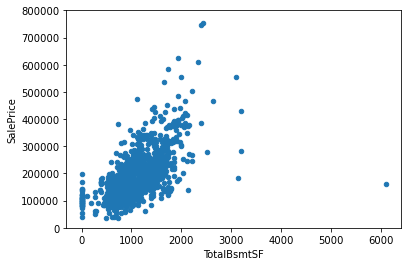

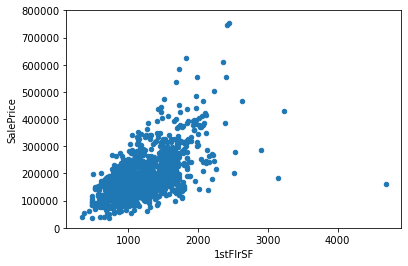

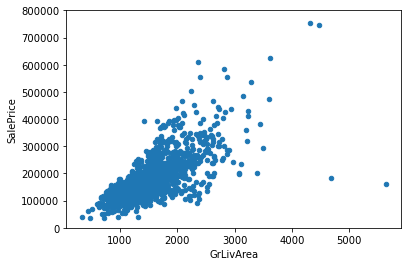

In [69]:
# choosing the numerical columns which make most sense to compare with the SalePrice using a scatter plot
var = ['LotFrontage','TotalBsmtSF','1stFlrSF','GrLivArea']
for i in var:
    data = pd.concat([df['SalePrice'], df[i]], axis=1)
    data.plot.scatter(x= i, y='SalePrice', ylim =(0,800000) )

<AxesSubplot:>

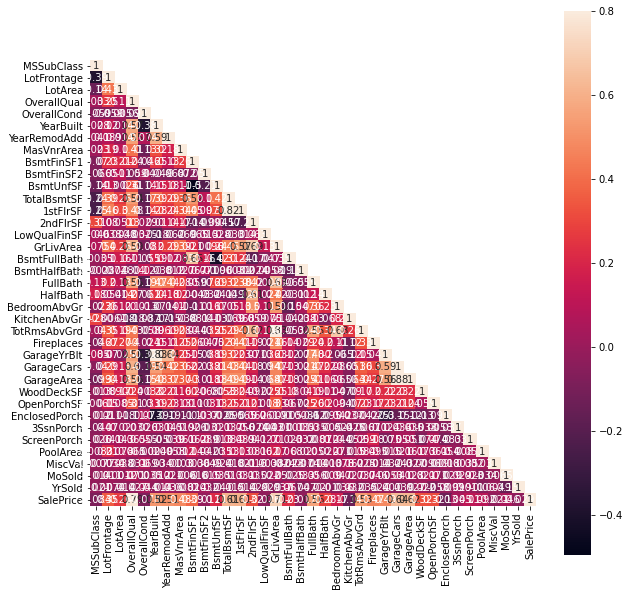

In [70]:
#using heatmap to better visualize the correlation between numeric variables; with masking redundant information
df_cor = df.corr()
mask = np.array(df_cor)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)    
sns.heatmap(df_cor,annot = True, mask=mask, vmax = 0.8, square = True)

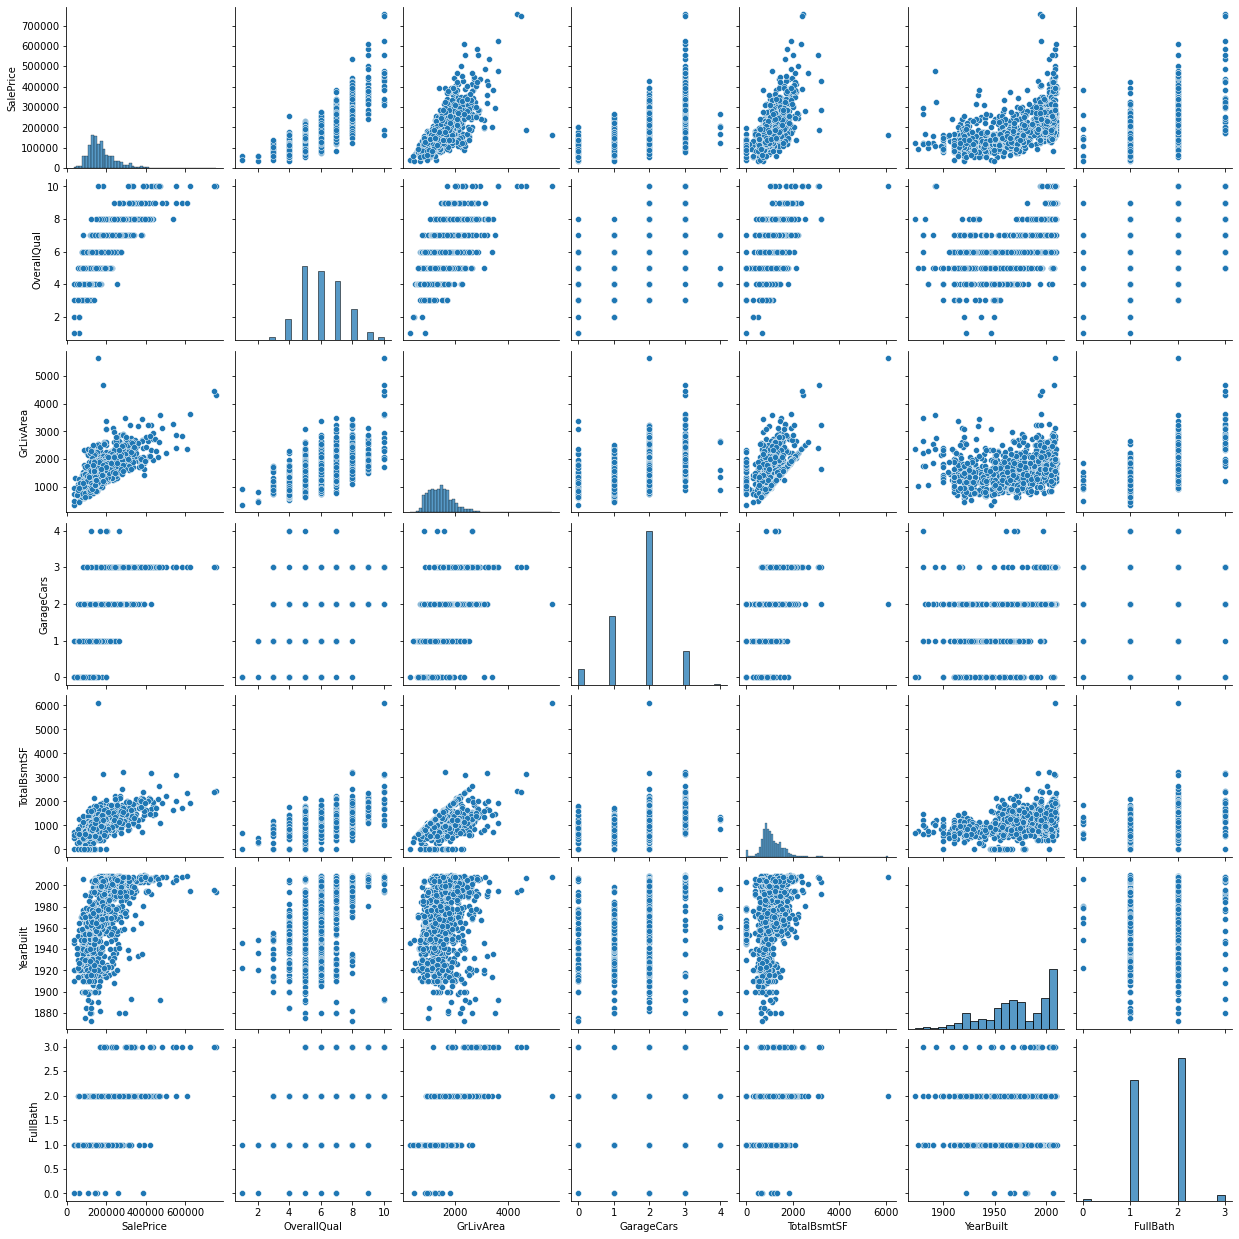

In [71]:
# the columns selected are the most useful according to visualisation
new_col = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','YearBuilt','FullBath']
sns.pairplot(df[new_col], size=2.5)

## DATA CLEANING

### III. Outlier Analysis

(-0.5, 9.5, 0.0, 800000.0)

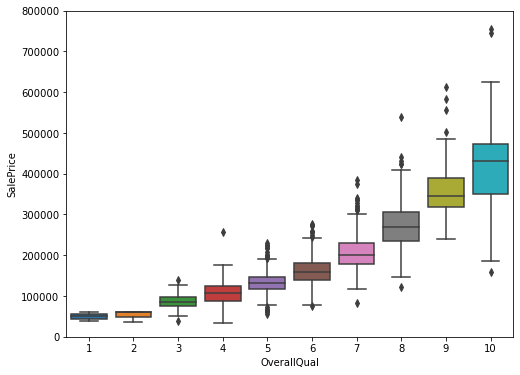

In [72]:
#the same list is selected as these aare most useful columns according to visualisation
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x = var, y= 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)

(-0.5, 111.5, 0.0, 800000.0)

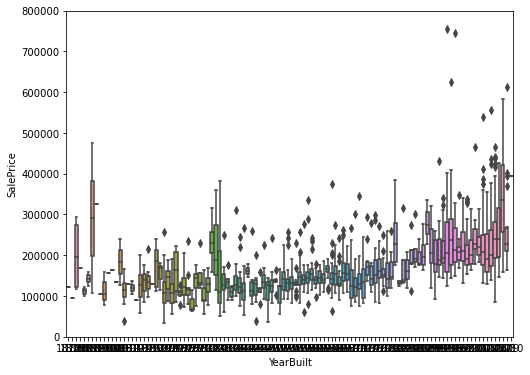

In [73]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x = var, y= 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)

### IV. MISSING VALUE

In [74]:
total = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum())/(df.isnull().count())).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys = ['total', 'percent'])
missing_data

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
...,...,...
Heating,0,0.000000
HeatingQC,0,0.000000
MSZoning,0,0.000000
1stFlrSF,0,0.000000


In [75]:
#to swap all NA values with none to avoid confusing them with missing values
col_nonull = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','MasVnrType','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
for i in col_nonull:
    df[i].fillna('None', inplace = True)
#Treating missing values by imputing for columns with missing values less than or equal to 40%
df['LotFrontage']= df.LotFrontage.fillna(df.LotFrontage.median()) # to avoid any influence of outliers
df['GarageYrBlt']= df.GarageYrBlt.fillna(df.GarageYrBlt.median()) 
df['MasVnrArea']= df.MasVnrArea.fillna(df.MasVnrArea.median()) 
df['Electrical']= df.Electrical.fillna('SBrkr')#mode of the Electrical column 

In [76]:
total = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum())/(df.isnull().count())).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys = ['total', 'percent'])
missing_data

,total,percent
MSSubClass,0,0.0
MSZoning,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
...,...,...
MasVnrArea,0,0.0
MasVnrType,0,0.0
Exterior2nd,0,0.0
Exterior1st,0,0.0


### VI. DATA PREPARATION

In [77]:
#deriving a variable which will calculate the age of the house
df['house_age'] = df['YrSold'] - df['YearBuilt']

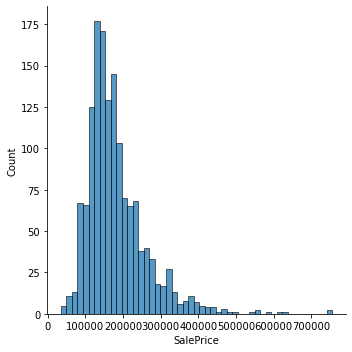

In [78]:
#checking for skewness again
sns.displot(df['SalePrice']) 

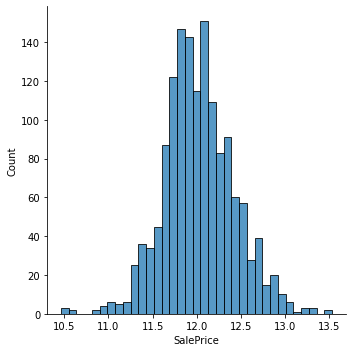

In [79]:
sns.displot(np.log(df['SalePrice'])) #therefore we will tranform the data into log as it is now normally distributed

In [80]:
df['transformed_SP'] = np.log(df['SalePrice'])
df_new = df

In [81]:
df_sca_dum = pd.get_dummies(categorical_df, drop_first=False)
df_new = df_new.drop(list(cat_df_col), axis =1)
df_new = pd.concat([df_new,df_sca_dum],axis =1)
df_new

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [82]:
y = df_new['transformed_SP']
x = df_new.drop(['SalePrice', 'transformed_SP', 'YrSold', 'MoSold', 'YearBuilt', 'YearRemodAdd'], axis = 1)
#already derived a column from this
#scaling the data
ss = StandardScaler()
ss.fit(x)

StandardScaler()

### VII. MODEL BUILDING USING LASSO

In [83]:
#applying the train test split function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [84]:
#using lasso for analysis
ls = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(ls, parameters, scoring='neg_mean_squared_error', cv=5,return_train_score = True, verbose = 1)
lasso_regressor.fit(x,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    3.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [85]:
lasso_regressor.best_params_ #gives best value for lambda/alpha

{'alpha': 0.001}

In [86]:
lasso_regressor.best_score_

-0.020158437980278155

In [87]:
cv_results = pd.DataFrame(lasso_regressor.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.149378,0.007643,0.002993,0.000162,0.0,{'alpha': 1e-15},-0.015781,-0.028850,-0.028978,-0.012653,...,-0.024587,0.008983,4,-0.008783,-0.007439,-0.007249,-0.008944,-0.008909,-0.008265,0.000756
1,0.146054,0.007150,0.003368,0.000686,0.0,{'alpha': 1e-10},-0.015781,-0.028849,-0.028977,-0.012653,...,-0.024587,0.008983,3,-0.008783,-0.007439,-0.007249,-0.008944,-0.008909,-0.008265,0.000756
2,0.149876,0.016622,0.002943,0.000130,0.0,{'alpha': 1e-08},-0.015781,-0.028692,-0.028965,-0.012652,...,-0.024555,0.008971,2,-0.008783,-0.007439,-0.007249,-0.008944,-0.008909,-0.008265,0.000756
3,0.019650,0.002768,0.002846,0.000017,0.001,{'alpha': 0.001},-0.012313,-0.022642,-0.016074,-0.012901,...,-0.020158,0.009123,1,-0.014557,-0.012269,-0.013724,-0.014689,-0.012562,-0.013560,0.000996
4,0.010171,0.000426,0.002834,0.000015,0.01,{'alpha': 0.01},-0.018088,-0.028898,-0.021675,-0.017205,...,-0.026633,0.011125,5,-0.024429,-0.022157,-0.023546,-0.024855,-0.019335,-0.022864,0.001992


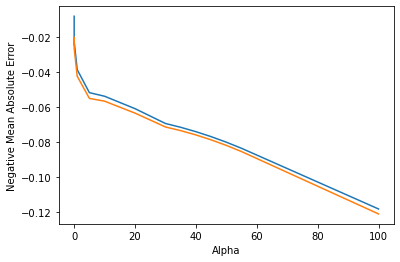

In [88]:
#plot mean train and test score against alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

#plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.show()

In [89]:
#predicting values for y using lasso
pred_lasso = lasso_regressor.predict(x_test)

<AxesSubplot:xlabel='transformed_SP', ylabel='Density'>

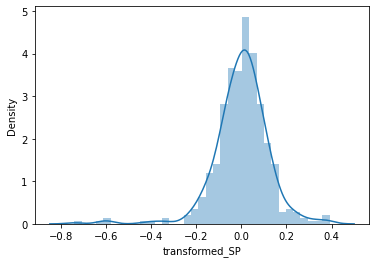

In [90]:
sns.distplot(y_test-pred_lasso)

In [91]:
#using the optimal value for lasso model creation
lasso_regressor = Lasso(alpha = 0.01)
lasso_regressor.fit(x_train, y_train)
lasso_regressor.coef_

array([-6.76328888e-04, -2.11759327e-04,  1.96804497e-06,  8.32345033e-02,
        4.24292745e-02, -1.54922660e-05,  8.27311463e-05,  7.02797875e-05,
        2.90116222e-05,  2.06441109e-05,  2.35996676e-04,  2.30078651e-04,
        2.29257544e-04,  2.97054563e-05,  7.20376907e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  2.23688044e-02,  1.21412283e-04,  0.00000000e+00,
        2.23124590e-04,  1.82833341e-04, -3.42530383e-05,  2.04907347e-04,
        2.73101127e-04,  3.32049894e-04, -9.84061762e-04, -6.39682624e-06,
       -3.93471415e-03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

In [92]:
m_p = list(lasso_regressor.coef_)
m_p.insert(0, lasso_regressor.intercept_)
m_p = [round(x, 3) for x in m_p]
cols = x.columns
cols = cols.insert(0, "constant")
sorted(list(zip(m_p,cols)), key=lambda x:abs(x[0]), reverse=True)

[(10.592, 'constant'),
 (0.083, 'OverallQual'),
 (0.042, 'OverallCond'),
 (0.022, 'Fireplaces'),
 (0.007, 'BsmtFullBath'),
 (-0.004, 'house_age'),
 (-0.001, 'MSSubClass'),
 (-0.001, 'PoolArea'),
 (-0.0, 'LotFrontage'),
 (0.0, 'LotArea'),
 (-0.0, 'MasVnrArea'),
 (0.0, 'BsmtFinSF1'),
 (0.0, 'BsmtFinSF2'),
 (0.0, 'BsmtUnfSF'),
 (0.0, 'TotalBsmtSF'),
 (0.0, '1stFlrSF'),
 (0.0, '2ndFlrSF'),
 (0.0, 'LowQualFinSF'),
 (0.0, 'GrLivArea'),
 (0.0, 'BsmtHalfBath'),
 (0.0, 'FullBath'),
 (0.0, 'HalfBath'),
 (0.0, 'BedroomAbvGr'),
 (-0.0, 'KitchenAbvGr'),
 (0.0, 'TotRmsAbvGrd'),
 (0.0, 'GarageYrBlt'),
 (0.0, 'GarageCars'),
 (0.0, 'GarageArea'),
 (0.0, 'WoodDeckSF'),
 (-0.0, 'OpenPorchSF'),
 (0.0, 'EnclosedPorch'),
 (0.0, '3SsnPorch'),
 (0.0, 'ScreenPorch'),
 (-0.0, 'MiscVal'),
 (-0.0, 'MSZoning_C (all)'),
 (0.0, 'MSZoning_FV'),
 (0.0, 'MSZoning_RH'),
 (0.0, 'MSZoning_RL'),
 (-0.0, 'MSZoning_RM'),
 (-0.0, 'Street_Grvl'),
 (0.0, 'Street_Pave'),
 (-0.0, 'Alley_Grvl'),
 (0.0, 'Alley_Pave'),
 (0.0, 'LotSh

The lasso does not provide us with accurate results on training or on test. Therefore we will try building it with ridge.

### VII. MODEL BUILDING USING RIDGE

In [93]:
rd = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ls, parameters, scoring='neg_mean_squared_error', cv=5,return_train_score = True, verbose = 1)
ridge_regressor.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [94]:
ridge_regressor.best_params_ #gives best value for lambda/alpha

{'alpha': 0.001}

In [95]:
ridge_regressor.best_score_

-0.022670032314134066

In [96]:
cv_results = pd.DataFrame(ridge_regressor.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.114271,0.014474,0.002890,0.000072,0.0,{'alpha': 1e-15},-0.016888,-0.053988,-0.030638,-0.013081,...,-0.025698,0.015498,2,-0.005563,-0.005808,-0.006054,-0.006426,-0.006140,-0.005998,0.000294
1,0.107683,0.008150,0.002861,0.000064,0.0,{'alpha': 1e-10},-0.016888,-0.053990,-0.030638,-0.013081,...,-0.025698,0.015498,3,-0.005563,-0.005808,-0.006054,-0.006426,-0.006140,-0.005998,0.000294
2,0.106203,0.008975,0.002825,0.000019,0.0,{'alpha': 1e-08},-0.016887,-0.054172,-0.030565,-0.013081,...,-0.025720,0.015560,4,-0.005563,-0.005808,-0.006054,-0.006426,-0.006140,-0.005998,0.000294
3,0.013933,0.001579,0.002859,0.000079,0.001,{'alpha': 0.001},-0.014803,-0.050131,-0.025848,-0.009518,...,-0.022670,0.014776,1,-0.011441,-0.009677,-0.010171,-0.012110,-0.012002,-0.011080,0.000983
4,0.007980,0.000251,0.002796,0.000007,0.01,{'alpha': 0.01},-0.023057,-0.062125,-0.033266,-0.014434,...,-0.030201,0.017171,5,-0.024024,-0.018431,-0.021372,-0.025498,-0.024737,-0.022812,0.002594


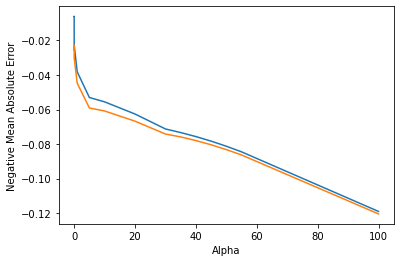

In [97]:
#plot mean train and test score against alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

#plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.show()

In [98]:
#optimal value for ridge is between 5-10
pred_ridge = ridge_regressor.predict(x_test)

<AxesSubplot:xlabel='transformed_SP', ylabel='Density'>

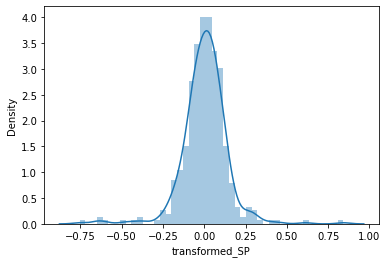

In [99]:
sns.distplot(y_test-pred_ridge)

In [100]:
ridge_regressor = Ridge(alpha = 8)
ridge_regressor.fit(x_train, y_train)
ridge_regressor.coef_

array([-5.32932185e-04, -4.27631683e-04,  1.71089335e-06,  5.41537726e-02,
        4.03176915e-02, -1.86164009e-05, -1.53962547e-05,  5.00556598e-05,
       -3.46641403e-06,  3.11929841e-05,  7.21999561e-05,  7.49013344e-05,
        4.42461207e-06,  1.51525898e-04,  4.95618180e-02,  1.01665490e-02,
        2.60494714e-02,  1.57967577e-02,  1.34071824e-02, -3.74868137e-02,
        9.82609154e-03,  6.99969824e-03, -1.44449822e-04,  5.38017103e-02,
        3.32010007e-05,  1.01403242e-04, -8.24735253e-06,  1.59230668e-04,
        2.52228613e-04,  2.07334377e-04, -4.16034185e-04, -3.25440143e-08,
       -1.41586929e-03, -1.32848124e-01,  4.21804680e-02,  4.15384147e-02,
        4.87919526e-02,  3.37288738e-04, -1.78781210e-02,  1.78781210e-02,
       -4.59260501e-03,  2.41068818e-02,  1.51999211e-03,  2.36133062e-02,
       -3.31981103e-02,  8.06481198e-03, -5.40547837e-02,  1.33833639e-02,
        2.08925712e-02,  1.97788486e-02,  1.37533387e-02, -1.37533387e-02,
        6.87322945e-03,  

In [101]:
m_p = list(ridge_regressor.coef_)
m_p.insert(0, ridge_regressor.intercept_)
m_p = [round(x, 3) for x in m_p]
cols = x.columns
cols = cols.insert(0, "constant")
sorted(list(zip(m_p,cols)), key=lambda x:abs(x[0]), reverse=True)

[(10.897, 'constant'),
 (-0.133, 'MSZoning_C (all)'),
 (-0.121, 'RoofMatl_ClyTile'),
 (-0.121, 'PoolQC_Gd'),
 (-0.114, 'Condition2_PosN'),
 (0.107, 'Neighborhood_Crawfor'),
 (-0.086, 'Neighborhood_Edwards'),
 (0.079, 'Neighborhood_NridgHt'),
 (0.069, 'PoolQC_Ex'),
 (0.066, 'Neighborhood_Somerst'),
 (0.062, 'SaleType_ConLD'),
 (0.059, 'Neighborhood_StoneBr'),
 (-0.058, 'Neighborhood_MeadowV'),
 (-0.057, 'SaleType_COD'),
 (0.055, 'BsmtQual_Ex'),
 (0.054, 'OverallQual'),
 (0.054, 'GarageCars'),
 (-0.054, 'LandContour_Bnk'),
 (0.053, 'BsmtExposure_Gd'),
 (0.052, 'Condition1_Norm'),
 (0.05, 'BsmtFullBath'),
 (0.05, 'Neighborhood_ClearCr'),
 (0.049, 'MSZoning_RL'),
 (-0.049, 'Neighborhood_IDOTRR'),
 (0.049, 'RoofMatl_WdShngl'),
 (0.049, 'KitchenQual_Ex'),
 (0.048, 'Exterior1st_BrkFace'),
 (0.045, 'Neighborhood_NoRidge'),
 (0.044, 'Heating_GasW'),
 (-0.043, 'BldgType_Twnhs'),
 (-0.043, 'Functional_Maj2'),
 (0.042, 'MSZoning_FV'),
 (0.042, 'MSZoning_RH'),
 (-0.042, 'Neighborhood_Blmngtn'),
 (-